# Prologue
When I put the music on to clean the room, I forgot to clean the room.

While cleaning my room, my ADHD often pulls me into moments of staring at the wall. In one of those moments, I imagine a scenario where I am in a data matrix brimming with potential - rows and columns (the dimensions) that unlock insights into a fascinating phenomenon. But as I dive deeper, the illusion starts to crack. Then the debris emerges: missing values, duplicate entries, invisible trails, and sneaky white spaces. This is not the clean, orderly 2D universe I envisioned. Instead, it is a chaotic landscape, cluttered with debris and scattered fragments that obscure the bigger picture.

# Four Moppers; Two from Spring Kleene. 

On a fine Saturday morning, four brave moppers take on the chaos. Two wield the legendary mop sticks of Spring Kleene, known for their precision, while the others come armed with powerful cleaning agents - ready to scrub away the grime of data. Together, they embark on a mission to restore order in the matrix.

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Will they succeed in mopping up the mess, or will the debris of imperfection prevail?

# Debris in the Matrix: Uncleaned Data Science Jobs. 

Data is like garbage. You'd better know what you are going to do with it before you collect it - Mark Twain

The first step before a cleaning job is to pull the data from wherever places you stashed them. In Python, the pandas library is your trusty broom, capable of sweeping through various file formats from CSV to Excel (.xlsx or .xls) files.

Below is a code that reads plus shows the data in pandas' data frame using the "read_csv" and head( ) methods respectively.

In [2]:
data = pd.read_csv("data/Uncleaned_DS_jobs.csv")
df = data.copy()
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


A peek into the first five rows of this matrix gives a glimpse of what is ahead. 


 →The trails of certain "\n…" in Company Name,

 → The long thread of texts in Job Description, and

→ Salary Estimate, Size, and Revenue need our attention.

### Would it lather or not?

Like washing dishes, You add a little detergent and hope for that rich, bubbly lather.

Like testing soap for a good lather, assessing data quality often reveals whether it is ready for use or plagued with greasy inconsistencies. The probability of missing values increases with the size of the dataset. Traditional eyeballing works well with small datasets. We could capture every entry in the matrix in one sitting without squinting our eyes. However, with a large matrix, it is impractical - a sloppy eye job.

Hence, an approach not straining on the eyeballs is required.

In [3]:
print("Shape of our data matrix:", df.shape)

Shape of our data matrix: (672, 15)


In [4]:
print("Shape after dropping duplicates:", df.drop_duplicates().shape)

Shape after dropping duplicates: (672, 15)


In [5]:
total_miss_val = (df.isnull().sum()).sum()
total_cells = np.product(df.shape)

perc_miss_val = (total_miss_val/total_cells)*100
print("% of missing values in this data set is", perc_miss_val)

% of missing values in this data set is 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


Hmm. Across 15 features, there are no missing values. But let's pause for a moment and take a deep reflection.
Wait! All we have done is check for the empty cells in the matrix. That's it! 
The result: 0.0% missing values and 672 non-null confirms just one thing. The absence of white spaces. However, it fails to reveal the actual content of these cells.

Do all the entities in the matrix truly belong there? Or are they just some debris?
 

### Detergent, Sunlight and The Sphere of Soap Water.
Sometimes, a quick swipe with the mop stick doesn't do the trick.
 

In the previous section, we applied traditional cleaning methods that only tell but can not show what is in the matrix. True data cleaning often requires a thorough multi-step approach. Using visualization, we can unpack the clutter that needs tidying up, giving us a clearer view of the data.



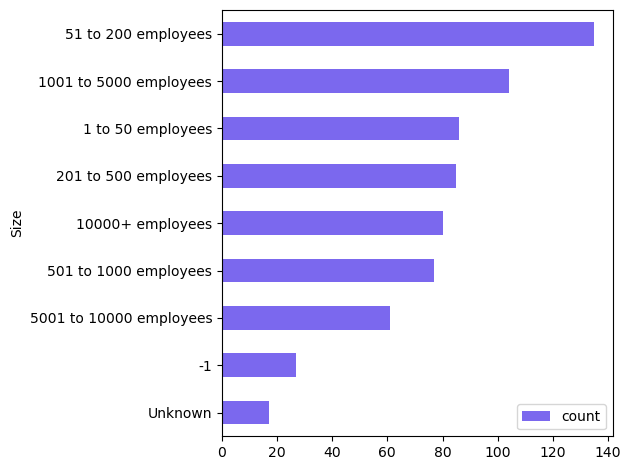

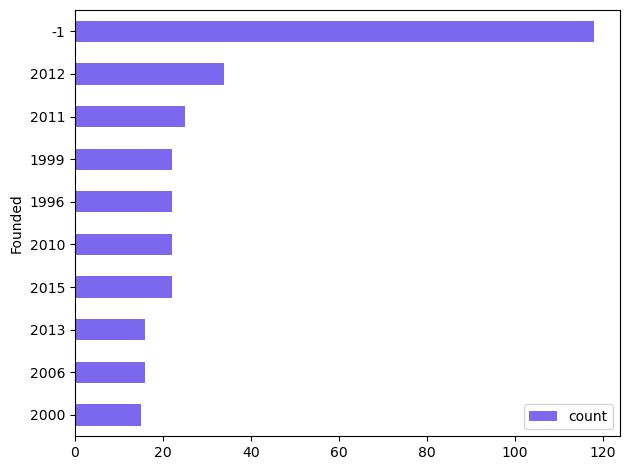

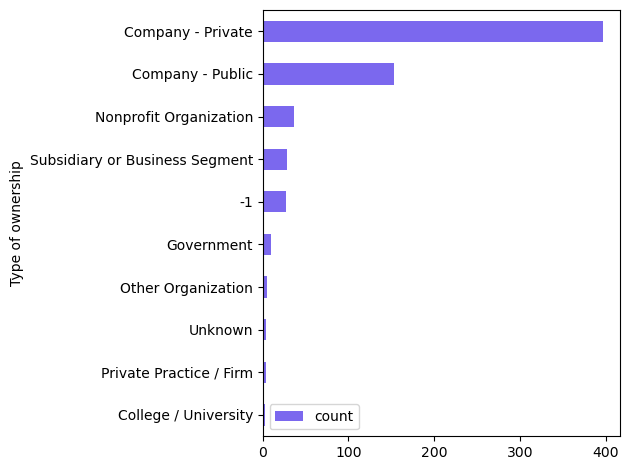

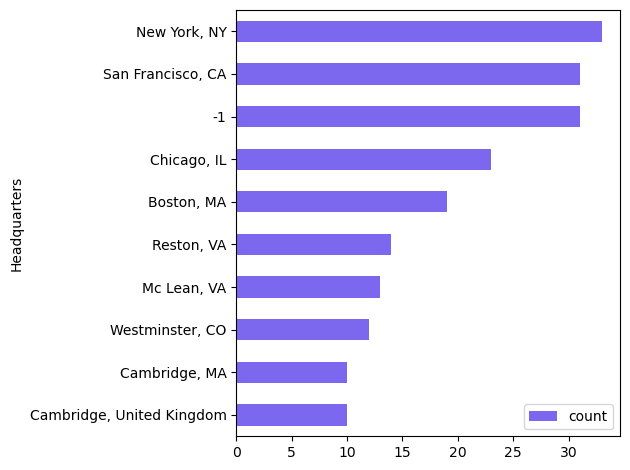

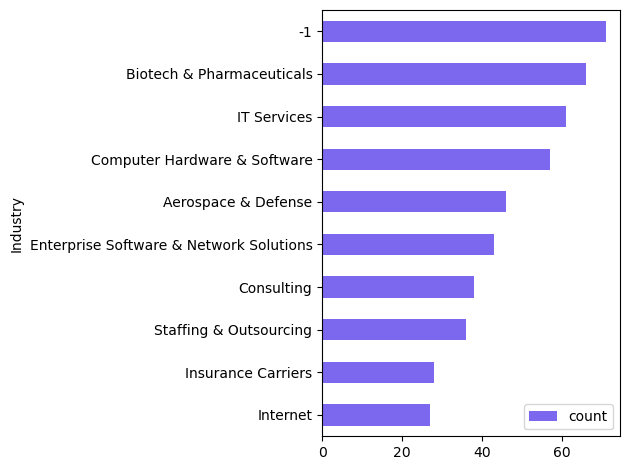

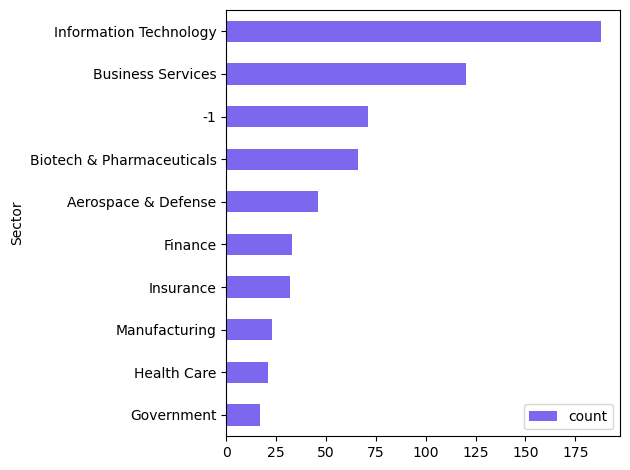

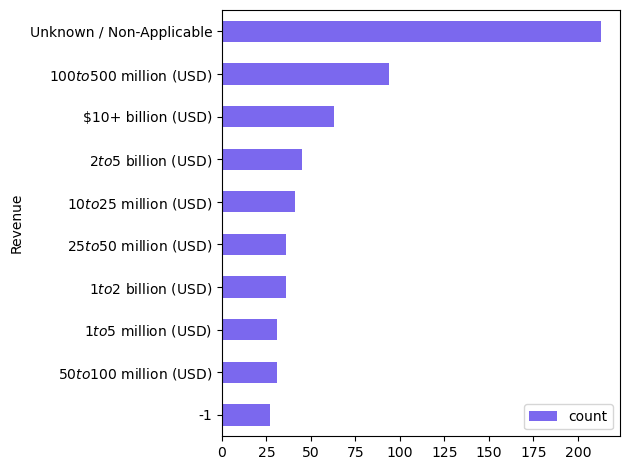

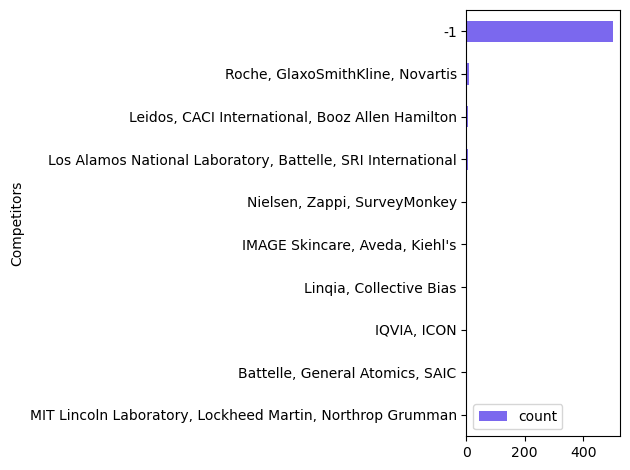

In [8]:
# Horiontal bar charts showing top 10 distinct labels within certain columns across the matrix
cols = [
    "Size","Founded","Type of ownership", "Headquarters", 
    "Industry","Sector","Revenue","Competitors"
       ]
for labels in cols:
    df[cols][labels].value_counts().head(10).sort_values(ascending = True).to_frame().plot(
        kind="barh", color= "mediumslateblue", 
    )
    plt.tight_layout()

Our suspicion proved to be on point after all.

We just unpacked the rubbish: -1 and Unknown. 

Likely, these debris are remnants - some of the rubble accumulated during the scraping process.

And so, we aptly name it: The Debris in the Matrix.

### Four Walls, A Mop, and A Cracking Knuckle.

What is the mission here?

Armed with guts and a trusty mop stick, the goal is to tidy up the data and restore order. Here's the cleaning checklist:

* Remove trails and leading characters.
* Replace extremely long names or labels.
* Split and create new features if necessary.
* Drop columns: (a) that are redundant, and (b) with high NaN counts.

### Buckets of Mop Water

It is not just cleaning. It is transformation

Here, we write a function called wring_out( ), that takes in a file path (unclean data), wrings out the mess by following our cleaning instructions, and returns a sparkling clean dataset.

In [8]:
def wring_out(filepath):
    
    # Read CSV file
    df = pd.read_csv(filepath)
    
    # Replace -1 and unknown for NaNs
    df=df.replace(["-1","Unknown / Non-Applicable", "Unknown"],"")  
    # Awkwardly long label in Job Title column 
    df["Job Title"] = df["Job Title"].replace([
    "ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR",
    "COMPUTER SCIENTIST - ENGINEER - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING", 
    "COMPUTER SCIENTIST - ENGINEER - RESEARCH COMPUTER SCIENTIST - TRANSPORTATION TECHNOLOGY"
    ],
    "Engineer/Research Computer Scientist" 
    )
    df["Job Title"] = df["Job Title"].replace(
    "Software Engineer - Machine Learning & Data Science (Applied Intelligence Services Team)",
    "Software Engineer/ML & Data Science"
    )
    df["Job Title"] = df["Job Title"].replace(
    "Lead Certified Clinical Laboratory Scientist - Saturday - Tuesday, 8:00pm - 6:30am shift",
    "Lead Certified Clinical Lab Scientist"
    )
       
    # Strip away leadings and trails in Rating, Salary Estimate, Company Name & Size
    df["Rating"] = df["Rating"].abs()
    
    df["Company Name"] = df["Company Name"].str.rstrip("\n0123456789.0123456789")
      
    # Split columns with minimum and maximum range 
    df[["SalaryMin(K)", "SalaryMax(K)"]] = df["Salary Estimate"].str.split("-", expand =True)
    df[["MinSize", "MaxSize"]] = df["Size"].str.split("to", expand = True)
    
     # Discard trails after spliting  
    df["SalaryMin(K)"] = df["SalaryMin(K)"].str.strip("$K")
    df["SalaryMax(K)"] = df["SalaryMax(K)"].str.strip("$KK(EmployK (Glassdoor est.)")
    df["MinSize"] = df["MinSize"].str.strip("+  employees")
    df["MaxSize"] = df["MaxSize"].str.strip(" employees")

    # Drop noisy or redundant features, especially those with high NA counts
    df.drop(
        columns = [
        "index","Size","Headquarters",
        "Job Description","Founded",
        "Type of ownership","Industry",
        "Sector","Competitors",
        "Salary Estimate","Revenue"        
    ],
            inplace = True
           )

    # Drop NaNs and reset the index of the records
    df = df.dropna().reset_index(drop = True)
    
    # Typecast object to i
    df["SalaryMin(K)"] = pd.to_numeric(df["SalaryMin(K)"])
    df["SalaryMax(K)"] = pd.to_numeric(df["SalaryMax(K)"])
    df["MinSize"] = pd.to_numeric(df["MinSize"])
    df["MaxSize"] = pd.to_numeric(df["MaxSize"])
    
    # Create "Avg_Salary" column
    df["Avg_Salary"]= ((df["SalaryMax(K)"] + df["SalaryMin(K)"])/2).astype(int)

    return df

Time to grab the mop and declare!

In [9]:
df = wring_out("DATA/Uncleaned_DS_jobs.csv")
df.head(10)

,Job Title,Rating,Company Name,Location,SalaryMin(K),SalaryMax(K),MinSize,MaxSize,Avg_Salary
0,Sr Data Scientist,3.1,Healthfirst,"New York, NY",137,171,1001,5000,154
1,Data Scientist,4.2,ManTech,"Chantilly, VA",137,171,5001,10000,154
2,Data Scientist,3.8,Analysis Group,"Boston, MA",137,171,1001,5000,154
3,Data Scientist,3.5,INFICON,"Newton, MA",137,171,501,1000,154
4,Data Scientist,2.9,Affinity Solutions,"New York, NY",137,171,51,200,154
5,Data Scientist,4.2,HG Insights,"Santa Barbara, CA",137,171,51,200,154
6,Data Scientist,3.5,iRobot,"Bedford, MA",137,171,1001,5000,154
7,Staff Data Scientist - Analytics,4.4,Intuit - Data,"San Diego, CA",137,171,5001,10000,154
8,Data Scientist,3.6,XSELL Technologies,"Chicago, IL",137,171,51,200,154
9,Data Scientist,4.5,Novetta,"Herndon, VA",137,171,501,1000,154


In [10]:
df.tail(10)

,Job Title,Rating,Company Name,Location,SalaryMin(K),SalaryMax(K),MinSize,MaxSize,Avg_Salary
538,Data Scientist,4.0,Comtech Global Inc,"Washington, DC",105,167,51,200,136
539,Data Scientist,3.8,"Aveshka, Inc","Washington, DC",105,167,51,200,136
540,Data Scientist,4.4,"SolutionIT, Inc","Edison, NJ",105,167,51,200,136
541,Data Scientist,4.1,A-Line Staffing Solutions,"Durham, NC",105,167,501,1000,136
542,Data Scientist,1.0,Clear Ridge Defense,"Quantico, VA",105,167,1,50,136
543,Data Scientist,3.8,"Criterion Systems, Inc","Vienna, VA",105,167,201,500,136
544,Data Scientist,4.0,Foundation Medicine,"Boston, MA",105,167,1001,5000,136
545,Data Scientist,3.6,TRANZACT,"Fort Lee, NJ",105,167,1001,5000,136
546,Data Scientist,5.0,ChaTeck Incorporated,"San Francisco, CA",105,167,1,50,136
547,Data Scientist,2.7,1-800-Flowers,"New York, NY",105,167,1001,5000,136


With a nod of approval, the dataset is spotless from the first row to the last. But then again…….

In [11]:
df.sample(10)

,Job Title,Rating,Company Name,Location,SalaryMin(K),SalaryMax(K),MinSize,MaxSize,Avg_Salary
53,Data Scientist,3.2,Postmates - Corporate HQ,"San Francisco, CA",75,131,1001,5000,103
131,Machine Learning Engineer,5.0,"Expedition Technology, Inc","Herndon, VA",90,109,1,50,99
36,Data Scientist,2.2,Great-Circle Technologies,"Chantilly, VA",75,131,1,50,103
42,Senior Data Scientist,4.8,Klaviyo,"Boston, MA",75,131,201,500,103
469,Machine Learning Engineer,3.9,Temboo,"New York, NY",128,201,1,50,164
396,Data Scientist,4.1,IntelliPro Group Inc,"Santa Clara, CA",31,56,201,500,43
223,Data Scientist,3.9,Rapid Value Solutions,"San Francisco, CA",90,124,201,500,107
361,Data Scientist,5.0,PeopleCom,"McLean, VA",79,133,1,50,106
81,Machine Learning Engineer,4.4,NuWave Solutions,"Springfield, VA",79,131,51,200,105
129,Senior Data Scientist,3.3,Tempo Automation,"San Francisco, CA",90,109,51,200,99


Proudly presents 10 random records from the freshly cleaned data in the matrix. It is a surprise inspection, and everything checks out right. This is how we call it a wrap!

THE END